<a href="https://colab.research.google.com/github/NikhilJ2712/Data-Science/blob/main/Case_Study3_Loan_Approval_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Data Manipulation Library
import pandas as pd
import numpy as np

# Importing Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt

# Import FilterWarnings Library
import warnings
warnings.filterwarnings('ignore')

# Import Logging
import logging
logging.basicConfig(level = logging.INFO,
                    filename ='model.log',
                    format = '%(asctime)s) - %(levelname)s - %(message)s',
                    filemode = 'w')
logging.info('Model Started')

In [2]:
# Importing Data using Pandas Function
df =pd.read_csv('/content/loan_data - loan_data.csv')

# It will print Shuffle 100% Dataset
df.sample(frac = 1)

# df.head() # it will print top five rows
# df.tail() # it will print bottom five rows

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
7018,23,male,Bachelor,73114,2,RENT,6200,DEBTCONSOLIDATION,10.65,0.08,3,642,Yes,0
13006,23,male,Bachelor,102990,0,RENT,12000,PERSONAL,10.37,0.12,4,638,No,0
16239,24,male,Associate,29542,1,MORTGAGE,7000,HOMEIMPROVEMENT,10.38,0.24,4,628,No,0
27174,29,female,High School,151288,7,MORTGAGE,25000,PERSONAL,10.62,0.17,8,688,No,0
35285,26,male,Master,72987,2,MORTGAGE,5000,PERSONAL,7.43,0.07,5,622,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28805,29,male,High School,22504,3,RENT,6400,DEBTCONSOLIDATION,10.37,0.28,6,686,No,1
11531,22,male,Master,79093,0,RENT,10000,DEBTCONSOLIDATION,10.00,0.13,2,591,Yes,0
30493,39,male,High School,68471,19,MORTGAGE,6000,HOMEIMPROVEMENT,11.36,0.09,13,552,Yes,0
37306,23,female,Master,67974,0,RENT,5481,EDUCATION,9.65,0.08,3,627,Yes,0


In [3]:
# Problem Definition: Loan Default Prediction
'''
This dataset contains information related to personal and loan attributes of individuals who have applied for loans. The objective is to predict whether a client will default on their loan based on their demographic, financial, and credit history details.

The target variable is loan_status, where:

1 indicates the loan was repaid successfully (non-default),

0 indicates the client defaulted on the loan.


 X (independent variables) include:

Demographic: person_age, person_gender, person_education

Financial: person_income, person_emp_exp, person_home_ownership

Loan details: loan_amnt, loan_intent, loan_int_rate, loan_percent_income

Credit info: cb_person_cred_hist_length, credit_score, previous_loan_defaults_on_file

y (target variable): loan_status (binary classification — Default or No Default)


Objective:
To build a classification model that can help financial institutions or lending platforms assess the risk of a loan default before approval. This will help reduce bad debt and improve decision-making in the loan underwriting process.

'''
# Checking Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int64  
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  int64  
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  int64  
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  int64  
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

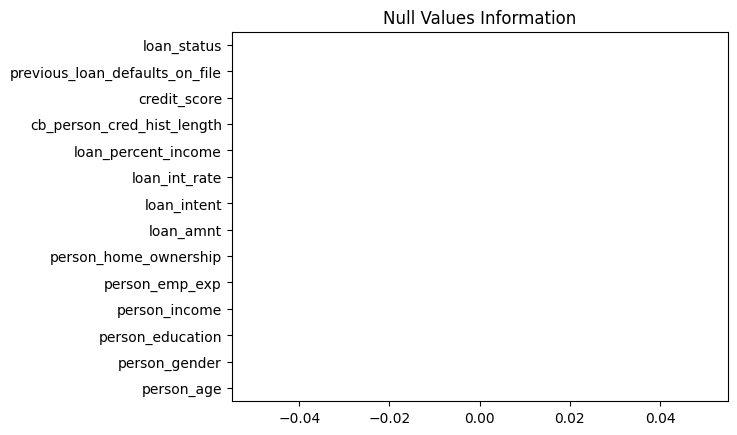

In [4]:
# Checking Null Values Present in Dataset
# The following Graph shows, we dont have any missing value present in any of the coloumn
df.isnull().sum().plot(kind = 'barh') # First Method
# sns.heatmap(df.isnull(),cmap='coolwarm',vmin=-1,vmax=1,center =0) # Second method
# df.isnull().sum().plot(kind = 'bar',cmap = 'viridis') # Third Method
plt.title('Null Values Information')
plt.show()

In [5]:
# Split the Dataset Into Categorical and Numerical
categorical_col = df.select_dtypes(include ='object')
categorical_col

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
0,female,Master,RENT,PERSONAL,No
1,female,High School,OWN,EDUCATION,Yes
2,female,High School,MORTGAGE,MEDICAL,No
3,female,Bachelor,RENT,MEDICAL,No
4,male,Master,RENT,MEDICAL,No
...,...,...,...,...,...
44995,male,Associate,RENT,MEDICAL,No
44996,female,Associate,RENT,HOMEIMPROVEMENT,No
44997,male,Associate,RENT,DEBTCONSOLIDATION,No
44998,male,Bachelor,RENT,EDUCATION,No


In [6]:
numerical_col = df.select_dtypes(exclude ='object')
numerical_col

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
0,22,71948,0,35000,16.02,0.49,3,561,1
1,21,12282,0,1000,11.14,0.08,2,504,0
2,25,12438,3,5500,12.87,0.44,3,635,1
3,23,79753,0,35000,15.23,0.44,2,675,1
4,24,66135,1,35000,14.27,0.53,4,586,1
...,...,...,...,...,...,...,...,...,...
44995,27,47971,6,15000,15.66,0.31,3,645,1
44996,37,65800,17,9000,14.07,0.14,11,621,1
44997,33,56942,7,2771,10.02,0.05,10,668,1
44998,29,33164,4,12000,13.23,0.36,6,604,1


In [7]:
# Exploratory Data Analysis:
# 1.Univariate Analysis
'''
Step1: Create a Blank List : stats[]
Step2: Create Dictionary using OrderedDict
Step3 : Append list with Dictionary
Step4: Convert List into DataFrame

'''
from collections import OrderedDict
import pandas as pd

stats = []

for i in numerical_col.columns:
  numerical_stats = OrderedDict({
     'Feature': i,
      'Count':df[i].count(),
      'Minimum':df[i].min(),
      'Maximum':df[i].max(),
      'Mean':df[i].mean(),
      'Median':df[i].median(),
      'Q1':df[i].quantile(0.25),
      'Q3':df[i].quantile(0.75),
      'IQR':df[i].quantile(0.75)-df[i].quantile(0.25),
      'Standard Deviation':df[i].std(),
      'Kurtosis':df[i].kurt(),
      'Skewness':df[i].skew(),
      'Range':df[i].max()-df[i].min(),
      'Variance':df[i].var()


  })
  stats.append(numerical_stats)
  report = pd.DataFrame(stats)

report


,Feature,Count,Minimum,Maximum,Mean,Median,Q1,Q3,IQR,Standard Deviation,Kurtosis,Skewness,Range,Variance
0,person_age,45000,20.00,144.00,27.764178,26.00,24.00,30.00,6.00,6.045108,18.649449,2.548154,124.00,3.654333e+01
1,person_income,45000,8000.00,7200766.00,80319.053222,67048.00,47204.00,95789.25,48585.25,80422.498632,2398.684769,34.137583,7192766.00,6.467778e+09
2,person_emp_exp,45000,0.00,125.00,5.410333,4.00,1.00,8.00,7.00,6.063532,19.168324,2.594917,125.00,3.676642e+01
3,loan_amnt,45000,500.00,35000.00,9583.157556,8000.00,5000.00,12237.25,7237.25,6314.886691,1.351215,1.179731,34500.00,3.987779e+07
4,loan_int_rate,45000,5.42,20.00,11.006606,11.01,8.59,12.99,4.40,2.978808,-0.420335,0.213784,14.58,8.873299e+00
5,loan_percent_income,45000,0.00,0.66,0.139725,0.12,0.07,0.19,0.12,0.087212,1.082416,1.034512,0.66,7.605987e-03
6,cb_person_cred_hist_length,45000,2.00,30.00,5.867489,4.00,3.00,8.00,5.00,3.879702,3.725945,1.631720,28.00,1.505209e+01
7,credit_score,45000,390.00,850.00,632.608756,640.00,601.00,670.00,69.00,50.435865,0.203022,-0.610261,460.00,2.543776e+03
8,loan_status,45000,0.00,1.00,0.222222,0.00,0.00,0.00,0.00,0.415744,-0.214176,1.336351,1.00,1.728433e-01


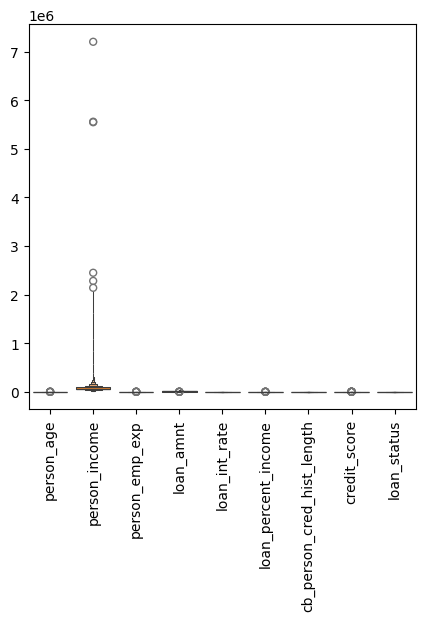

In [8]:
plt.figure(figsize = (5,5))
sns.boxenplot(data = df)
plt.xticks(rotation = 90)
plt.show()

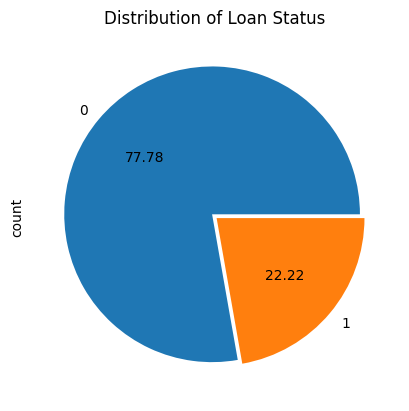

In [9]:
# Distribution of Loan Status

'''
Data Insights:
77.78 % people Not Approved their Loan Status From Bank
22.22 % people Approved their Loan Status From Bank

'''
df['loan_status'].value_counts().plot(kind ='pie',autopct ='%1.2f',explode = [0.02,0.02])
plt.title('Distribution of Loan Status')
plt.show()

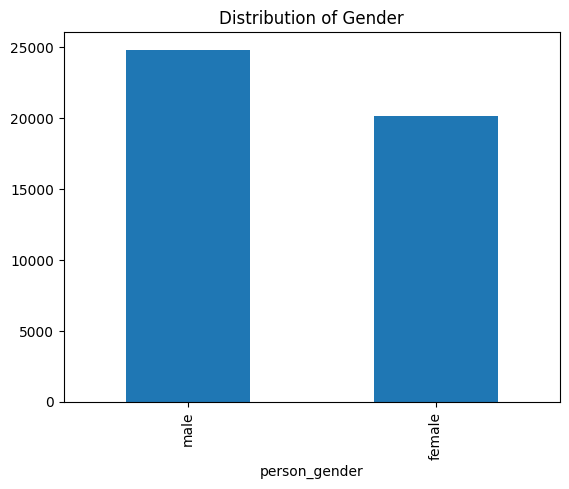

In [10]:
# Gender Disrtibution

df['person_gender'].value_counts().plot(kind ='bar')
plt.title('Distribution of Gender')
plt.show()

In [11]:
# Loan status based on gender
# Loan is approved and Gender must be male
loan_status_approved_male=df[(df['loan_status'] == 1) & (df['person_gender'] == 'male')]
loan_status_approved_male

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
4,24,male,Master,66135,1,RENT,35000,MEDICAL,14.27,0.53,4,586,No,1
12,23,male,Bachelor,114860,3,RENT,35000,VENTURE,7.90,0.30,2,573,No,1
13,26,male,Master,130713,0,RENT,35000,EDUCATION,18.39,0.27,4,708,No,1
18,23,male,Bachelor,136628,0,RENT,35000,DEBTCONSOLIDATION,18.25,0.26,4,709,No,1
24,22,male,Bachelor,97420,1,RENT,33950,PERSONAL,14.54,0.35,4,691,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44991,24,male,High School,37786,0,MORTGAGE,13500,EDUCATION,13.43,0.36,4,612,No,1
44995,27,male,Associate,47971,6,RENT,15000,MEDICAL,15.66,0.31,3,645,No,1
44997,33,male,Associate,56942,7,RENT,2771,DEBTCONSOLIDATION,10.02,0.05,10,668,No,1
44998,29,male,Bachelor,33164,4,RENT,12000,EDUCATION,13.23,0.36,6,604,No,1


In [12]:
# Loan is approved and Gender must be female
loan_status_approved_female=df[(df['loan_status'] == 1) & (df['person_gender'] == 'female')]
loan_status_approved_female

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948,0,RENT,35000,PERSONAL,16.02,0.49,3,561,No,1
2,25,female,High School,12438,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3,635,No,1
3,23,female,Bachelor,79753,0,RENT,35000,MEDICAL,15.23,0.44,2,675,No,1
5,21,female,High School,12951,0,OWN,2500,VENTURE,7.14,0.19,2,532,No,1
6,26,female,Bachelor,93471,1,RENT,35000,EDUCATION,12.42,0.37,3,701,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44988,28,female,Associate,49170,4,RENT,10401,HOMEIMPROVEMENT,11.97,0.21,6,677,No,1
44992,23,female,Bachelor,40925,0,RENT,9000,PERSONAL,11.01,0.22,4,487,No,1
44993,27,female,High School,35512,4,RENT,5000,PERSONAL,15.83,0.14,5,505,No,1
44994,24,female,Associate,31924,2,RENT,12229,MEDICAL,10.70,0.38,4,678,No,1


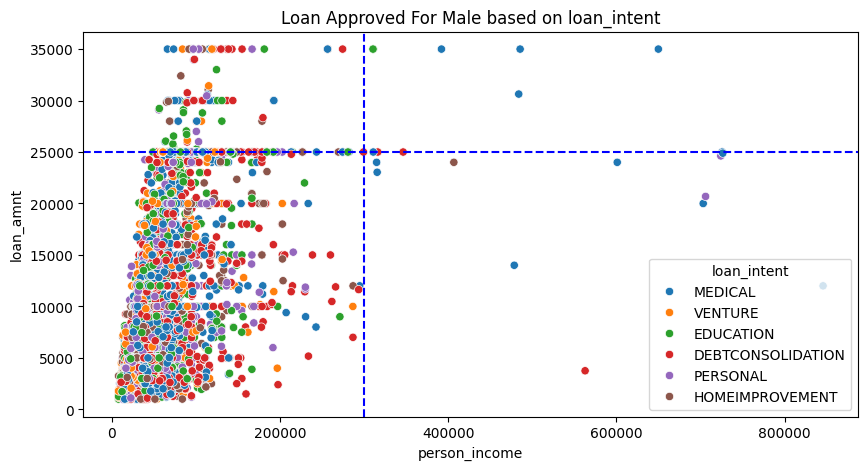

In [13]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = loan_status_approved_male['person_income'], y = loan_status_approved_male['loan_amnt'],hue =loan_status_approved_male['loan_intent'])
plt.title('Loan Approved For Male based on loan_intent')
plt.axvline(300000,linestyle='--',c = 'b')
plt.axhline(25000,linestyle='--',c = 'b')
plt.show()

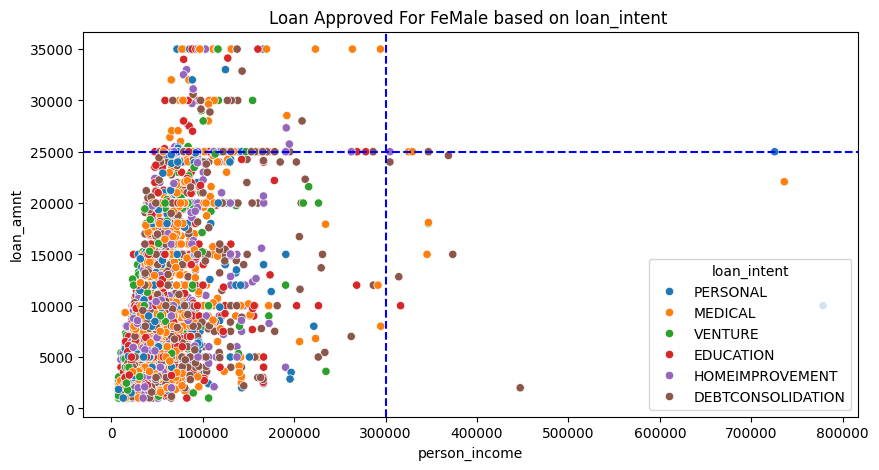

In [14]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = loan_status_approved_female['person_income'], y = loan_status_approved_female['loan_amnt'],hue =loan_status_approved_female['loan_intent'])
plt.title('Loan Approved For FeMale based on loan_intent ')
plt.axvline(300000,linestyle='--',c = 'b')
plt.axhline(25000,linestyle='--',c = 'b')
plt.show()

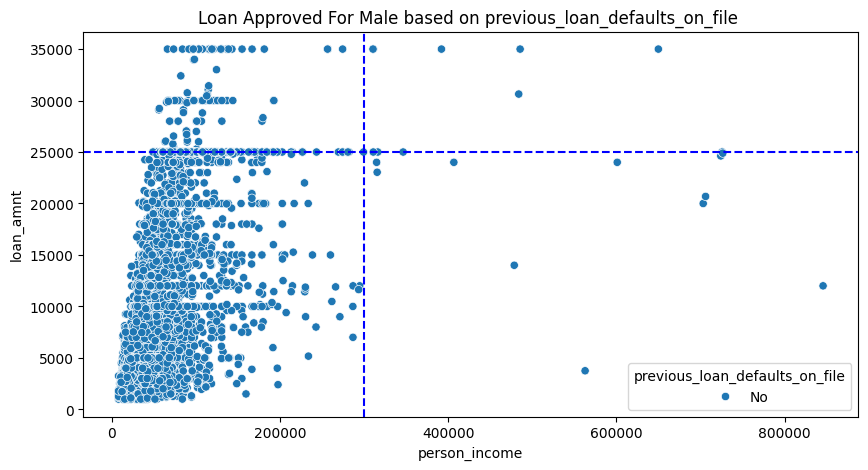

In [15]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = loan_status_approved_male['person_income'], y = loan_status_approved_male['loan_amnt'],hue =loan_status_approved_male['previous_loan_defaults_on_file'])
plt.title('Loan Approved For Male based on previous_loan_defaults_on_file ')
plt.axvline(300000,linestyle='--',c = 'b')
plt.axhline(25000,linestyle='--',c = 'b')
plt.show()


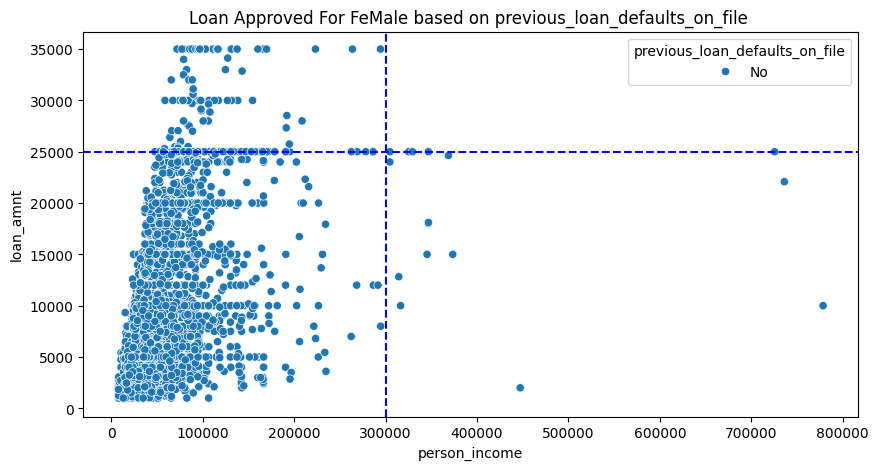

In [16]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = loan_status_approved_female['person_income'], y = loan_status_approved_female['loan_amnt'],hue =loan_status_approved_female['previous_loan_defaults_on_file'])
plt.title('Loan Approved For FeMale based on previous_loan_defaults_on_file ')
plt.axvline(300000,linestyle='--',c = 'b')
plt.axhline(25000,linestyle='--',c = 'b')
plt.show()

In [17]:
loan_status_notapproved_male=df[(df['loan_status'] == 0) & (df['person_gender'] == 'male')]
loan_status_notapproved_male

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
16,23,male,Bachelor,144943,0,RENT,35000,EDUCATION,7.90,0.24,4,663,No,0
20,25,male,Bachelor,195718,0,RENT,35000,VENTURE,7.49,0.18,4,684,Yes,0
21,25,male,High School,165792,4,RENT,34800,PERSONAL,16.77,0.21,2,662,No,0
27,23,male,High School,14293,0,OWN,1400,PERSONAL,9.32,0.10,3,607,No,0
31,25,male,Bachelor,144855,1,RENT,32000,VENTURE,6.62,0.22,2,586,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42098,26,male,Associate,85414,2,RENT,12000,EDUCATION,6.72,0.14,4,509,Yes,0
42099,25,male,Bachelor,165605,0,MORTGAGE,9989,VENTURE,5.92,0.06,4,648,No,0
42100,27,male,Associate,96196,1,MORTGAGE,8000,MEDICAL,6.38,0.08,8,593,Yes,0
42103,36,male,Bachelor,60006,15,OWN,2755,MEDICAL,8.92,0.05,9,609,Yes,0


In [18]:
loan_status_notapproved_female=df[(df['loan_status'] == 0) & (df['person_gender'] == 'female')]
loan_status_notapproved_female

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,21,female,High School,12282,0,OWN,1000,EDUCATION,11.14,0.08,2,504,Yes,0
14,23,female,Associate,138998,0,RENT,35000,EDUCATION,7.90,0.25,4,583,No,0
15,23,female,Master,600891,5,MORTGAGE,30000,DEBTCONSOLIDATION,10.65,0.05,3,670,Yes,0
23,24,female,Bachelor,13866,0,OWN,1500,PERSONAL,7.29,0.11,3,600,Yes,0
33,25,female,High School,368115,3,RENT,24250,DEBTCONSOLIDATION,13.85,0.07,3,567,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42101,27,female,High School,107051,2,MORTGAGE,24000,MEDICAL,11.21,0.22,5,611,Yes,0
42102,28,female,Associate,36900,6,RENT,2000,VENTURE,5.77,0.05,6,526,Yes,0
42104,25,female,Bachelor,64146,2,MORTGAGE,7200,VENTURE,10.28,0.11,3,625,Yes,0
42106,28,female,High School,110291,7,RENT,13453,VENTURE,13.29,0.12,6,631,Yes,0


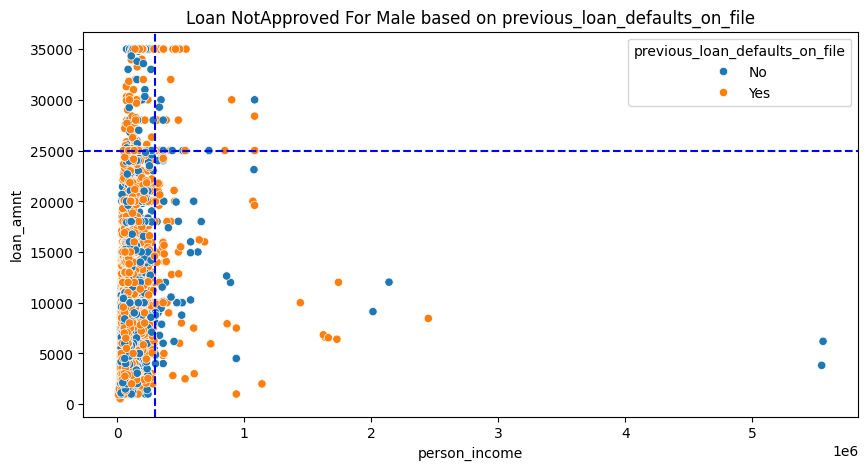

In [19]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = loan_status_notapproved_male['person_income'], y = loan_status_notapproved_male['loan_amnt'],hue =loan_status_notapproved_male['previous_loan_defaults_on_file'])
plt.title('Loan NotApproved For Male based on previous_loan_defaults_on_file')
plt.axvline(300000,linestyle='--',c = 'b')
plt.axhline(25000,linestyle='--',c = 'b')
plt.show()

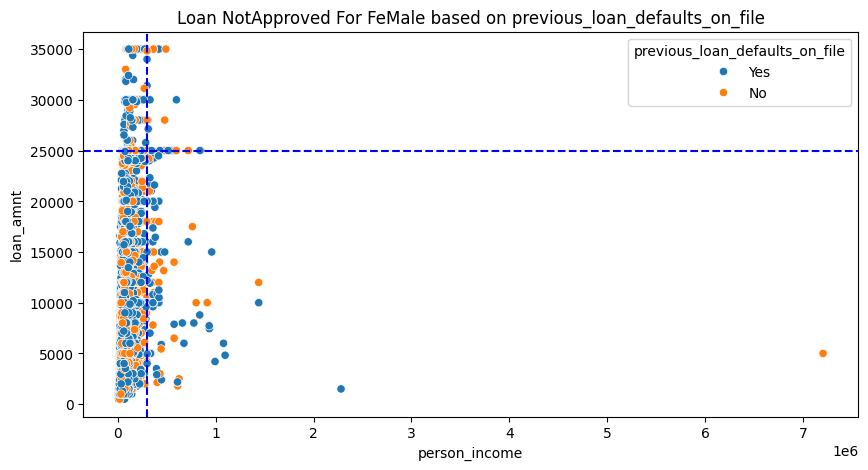

In [20]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = loan_status_notapproved_female['person_income'], y = loan_status_notapproved_female['loan_amnt'],hue =loan_status_notapproved_female['previous_loan_defaults_on_file'])
plt.title('Loan NotApproved For FeMale based on previous_loan_defaults_on_file')
plt.axvline(300000,linestyle='--',c = 'b')
plt.axhline(25000,linestyle='--',c = 'b')
plt.show()

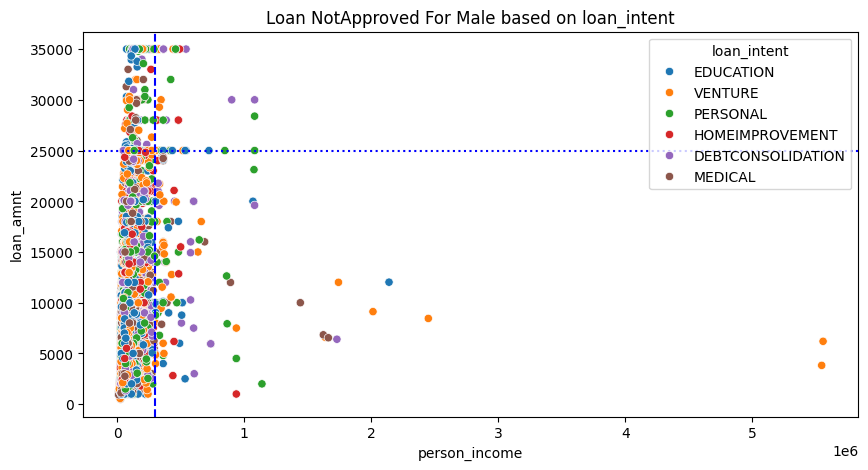

In [21]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = loan_status_notapproved_male['person_income'],y = loan_status_notapproved_male['loan_amnt'],hue = loan_status_notapproved_male['loan_intent'])
plt.title('Loan NotApproved For Male based on loan_intent')
plt.axvline(300000,linestyle = '--',c = 'b')
plt.axhline(25000,linestyle = ':',c = 'b')
plt.show()

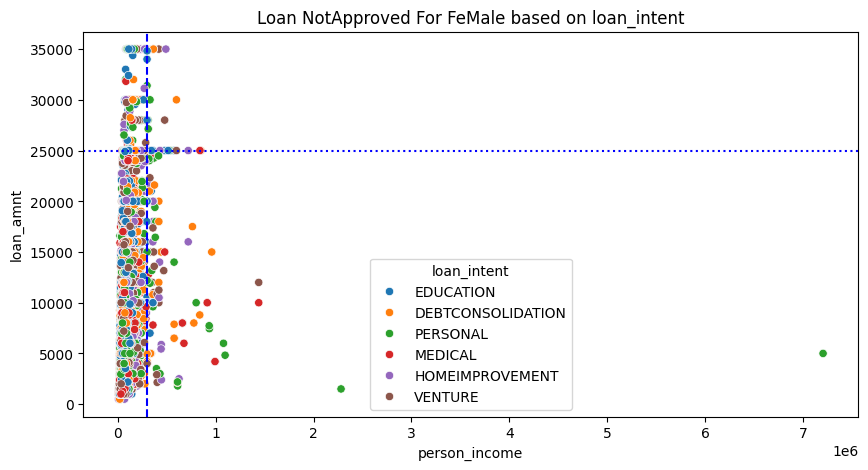

In [22]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = loan_status_notapproved_female['person_income'],y = loan_status_notapproved_female['loan_amnt'],hue = loan_status_notapproved_female['loan_intent'])
plt.title('Loan NotApproved For FeMale based on loan_intent')
plt.axvline(300000,linestyle = '--',c = 'b')
plt.axhline(25000,linestyle = ':',c = 'b')
plt.show()